In [1]:
import pandas as pd
from arcgis import GIS

### this is week 05

In [2]:
gis = GIS()
m = gis.map('USA', zoomlevel=4)

In [9]:
sedf = pd.DataFrame.spatial.from_featureclass("2024_Vehicle_Level_Crash_Details")

In [10]:
sedf.spatial.plot()

MapView(layout=Layout(height='400px', width='100%'))

### SHAPE column
#### The SHAPE column holds the geometry for each record in the DataFrame. 

In [ ]:
sedf.head()

In [12]:
# Check the column and row in sedf
sedf.shape

(6803, 151)

In [13]:
sedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6803 entries, 0 to 6802
Columns: 151 entries, FID to SHAPE
dtypes: Float64(4), Int32(9), Int64(1), datetime64[us](1), geometry(1), string(135)
memory usage: 7.7 MB


In [14]:
sedf.spatial.geometry_type

['point', None]

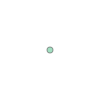

In [15]:
# Visualize geometry
sedf.SHAPE[0]

In [16]:
sedf.columns

Index(['FID', 'OBJECTID', 'CRASH_NUMB', 'CITY_TOWN_', 'CRASH_DATE',
       'CRASH_DA_1', 'CRASH_STAT', 'CRASH_SEVE', 'MAX_INJR_S', 'NUMB_VEHC',
       ...
       'DRIVER_VIO', 'NON_MTRS_3', 'NON_MTRS_4', 'NON_MTRS_5', 'NON_MTRS_6',
       'NON_MTRS_7', 'NON_MTRS_8', 'TRAFFIC_CO', 'SHAPE_1', 'SHAPE'],
      dtype='object', length=151)

In [17]:
new_sedf = sedf.loc[:,['CRASH_SEVE','NUMB_VEHC', 'TRAFFIC_CO','SHAPE']]
new_sedf

,CRASH_SEVE,NUMB_VEHC,TRAFFIC_CO,SHAPE
0,Property damage only (none injured),2,,"{""x"": 175799.5225000009, ""y"": 891002.076600000..."
1,Property damage only (none injured),2,,"{""x"": 175799.5225000009, ""y"": 891002.076600000..."
2,Property damage only (none injured),2,,"{""x"": 175994.68299999833, ""y"": 893358.65329999..."
3,Property damage only (none injured),2,,"{""x"": 175994.68299999833, ""y"": 893358.65329999..."
4,Property damage only (none injured),3,,"{""x"": 175639.38759999722, ""y"": 891405.46480000..."
...,...,...,...,...
6798,Property damage only (none injured),2,,"{""x"": 174673.46880000085, ""y"": 892618.37489999..."
6799,Non-fatal injury,3,,"{""x"": 173238.51539999992, ""y"": 889548.00010000..."
6800,Non-fatal injury,3,,"{""x"": 173238.51539999992, ""y"": 889548.00010000..."
6801,Non-fatal injury,3,,"{""x"": 173238.51539999992, ""y"": 889548.00010000..."


### Visualizing data with SEDF

[Visualizaing data](https://developers.arcgis.com/python/guide/visualizing-data-with-the-spatially-enabled-dataframe/)

In [18]:
new_sedf.spatial.plot(renderer_type='u', col = 'CRASH_SEVE')

MapView(layout=Layout(height='400px', width='100%'))

In [19]:
new_sedf.spatial.plot(renderer_type='h')

MapView(layout=Layout(height='400px', width='100%'))

In [23]:
new_sedf = sedf.loc[:,['CRASH_SEVE', 'DRIVER_AGE','SHAPE']]
new_sedf

,CRASH_SEVE,DRIVER_AGE,SHAPE
0,Property damage only (none injured),22,"{""x"": 175799.5225000009, ""y"": 891002.076600000..."
1,Property damage only (none injured),44,"{""x"": 175799.5225000009, ""y"": 891002.076600000..."
2,Property damage only (none injured),29,"{""x"": 175994.68299999833, ""y"": 893358.65329999..."
3,Property damage only (none injured),44,"{""x"": 175994.68299999833, ""y"": 893358.65329999..."
4,Property damage only (none injured),56,"{""x"": 175639.38759999722, ""y"": 891405.46480000..."
...,...,...,...
6798,Property damage only (none injured),38,"{""x"": 174673.46880000085, ""y"": 892618.37489999..."
6799,Non-fatal injury,19,"{""x"": 173238.51539999992, ""y"": 889548.00010000..."
6800,Non-fatal injury,76,"{""x"": 173238.51539999992, ""y"": 889548.00010000..."
6801,Non-fatal injury,42,"{""x"": 173238.51539999992, ""y"": 889548.00010000..."


In [24]:
paths = r'M:\python_UTD\sample_sedf.shp'

new_sedf.spatial.to_featureclass(paths)

'M:\\python_UTD\\sample_sedf.shp'

### Cursors in arcpy
- Cursors are in-memory objects used to iterate over and manipulate rows in feature classes or tables within a geodatabase. 
- They can read, update, or delete data efficiently. 

#### There are three main types of cursors
- SearchCursor(): Read only view of data from a table or feature class
- InsertCursor(): Adds rows to a table or feature class
- UpdateCursor(): Edit or delete rows in a table or feature class

### Describt(): Return Descriptive Information about a feature class
- arcpy.Describe(): https://pro.arcgis.com/en/pro-app/latest/arcpy/functions/describe-object-properties.htm

In [25]:
desc = arcpy.Describe("zip_Worcester")

In [26]:
print("The data type is:" + desc.datatype)

The data type is:FeatureLayer


In [27]:
print("The shape type is:" + desc.shapetype)

The shape type is:Polygon


### List the column names

In [29]:
feature_class = "2024_Vehicle_Level_Crash_Details"
fields = arcpy.ListFields(feature_class)

# Print the name of each field
for field in fields:
    print(field.name)

FID
Shape
OBJECTID
CRASH_NUMB
CITY_TOWN_
CRASH_DATE
CRASH_DA_1
CRASH_STAT
CRASH_SEVE
MAX_INJR_S
NUMB_VEHC
NUMB_NONFA
NUMB_FATAL
POLC_AGNCY
MANR_COLL_
VEHC_MNVR_
VEHC_TRVL_
VEHC_SEQ_E
AMBNT_LIGH
WEATH_COND
ROAD_SURF_
FIRST_HRMF
MOST_HRMFL
DRVR_CNTRB
VEHC_CONFI
STREET_NUM
RDWY
DIST_DIRC_
NEAR_INT_R
MM_RTE
DIST_DIR_1
MILEMARKER
EXIT_RTE
DIST_DIR_2
EXIT_NUMB
DIST_DIR_3
LANDMARK
RDWY_JNCT_
TRAF_CNTRL
TRAFY_DESC
JURISDICTN
FIRST_HR_1
NON_MTRST_
NON_MTRS_1
NON_MTRS_2
IS_GEOCODE
GEOCODING_
X
Y
LAT
LON
RMV_DOC_ID
CRASH_RPT_
YEAR
AGE_DRVR_Y
AGE_DRVR_O
AGE_NONMTR
AGE_NONM_1
DRVR_DISTR
DISTRICT_N
RPA_ABBR
VEHC_EMER_
VEHC_TOWED
CNTY_NAME
FMCSA_RPTB
FMCSA_RP_1
HIT_RUN_DE
LCLTY_NAME
ROAD_CNTRB
SCHL_BUS_R
SPEED_LIMI
TRAF_CNT_1
WORK_ZONE_
AADT
AADT_YEAR
PK_PCT_SUT
AV_PCT_SUT
PK_PCT_CT
AV_PCT_CT
CURB
TRUCK_RTE
LT_SIDEWLK
RT_SIDEWLK
SHLDR_LT_W
SHLDR_LT_T
SURFACE_WD
SURFACE_TP
SHLDR_RT_W
SHLDR_RT_T
NUM_LANES
OPP_LANES
MED_WIDTH
MED_TYPE
URBAN_TYPE
F_CLASS
URBAN_AREA
FD_AID_RTE
FACILITY
OPERATION
CONTROL
P

### SearchCursor
- [SearchCursor](https://pro.arcgis.com/en/pro-app/latest/arcpy/data-access/searchcursor-class.htm) is a read-only cursor object so it can't be used to insert of update existing records. You can only view the contents. 
- Loop through each record in the cursor

#### Iterate through a feature class and print the values of specific fields.
- with statement:This statement is used to open the cursor. 


In [31]:
fields = ["DRIVER_AGE"]
with arcpy.da.SearchCursor(feature_class, fields) as cursor:
    for row in cursor:
        print(row)

(22,)
(44,)
(29,)
(44,)
(56,)
(64,)
(24,)
(40,)
(32,)
(42,)
(47,)
(0,)
(32,)
(27,)
(46,)
(0,)
(21,)
(25,)
(54,)
(41,)
(32,)
(22,)
(45,)
(25,)
(37,)
(35,)
(36,)
(52,)
(39,)
(64,)
(64,)
(55,)
(22,)
(27,)
(35,)
(20,)
(36,)
(28,)
(73,)
(17,)
(29,)
(70,)
(18,)
(0,)
(0,)
(55,)
(30,)
(43,)
(58,)
(34,)
(71,)
(32,)
(0,)
(0,)
(29,)
(32,)
(38,)
(17,)
(22,)
(57,)
(34,)
(26,)
(53,)
(32,)
(0,)
(24,)
(25,)
(40,)
(17,)
(38,)
(0,)
(46,)
(50,)
(38,)
(40,)
(18,)
(63,)
(40,)
(22,)
(65,)
(35,)
(33,)
(26,)
(28,)
(30,)
(40,)
(53,)
(42,)
(0,)
(21,)
(0,)
(48,)
(0,)
(30,)
(23,)
(0,)
(48,)
(43,)
(30,)
(58,)
(0,)
(59,)
(33,)
(40,)
(26,)
(36,)
(32,)
(0,)
(26,)
(52,)
(20,)
(61,)
(70,)
(33,)
(56,)
(35,)
(43,)
(0,)
(22,)
(36,)
(0,)
(21,)
(36,)
(45,)
(41,)
(51,)
(51,)
(58,)
(36,)
(0,)
(27,)
(29,)
(27,)
(25,)
(36,)
(22,)
(38,)
(20,)
(37,)
(68,)
(22,)
(30,)
(25,)
(64,)
(52,)
(20,)
(59,)
(34,)
(51,)
(24,)
(35,)
(48,)
(39,)
(34,)
(27,)
(0,)
(0,)
(0,)
(0,)
(53,)
(58,)
(59,)
(36,)
(34,)
(42,)
(0,)
(0,)
(72,)
(31,)
(71,)
(21

(20,)
(57,)
(67,)
(32,)
(41,)
(54,)
(57,)
(49,)
(48,)
(0,)
(0,)
(0,)
(0,)
(25,)
(35,)
(67,)
(31,)
(33,)
(0,)
(23,)
(0,)
(33,)
(0,)
(0,)
(29,)
(40,)
(46,)
(62,)
(44,)
(34,)
(42,)
(36,)
(0,)
(29,)
(51,)
(32,)
(59,)
(41,)
(51,)
(27,)
(51,)
(75,)
(73,)
(50,)
(31,)
(41,)
(66,)
(76,)
(41,)
(21,)
(20,)
(39,)
(17,)
(39,)
(47,)
(0,)
(32,)
(69,)
(18,)
(35,)
(44,)
(41,)
(62,)
(37,)
(55,)
(32,)
(19,)
(21,)
(18,)
(71,)
(0,)
(0,)
(26,)
(0,)
(27,)
(29,)
(60,)
(60,)
(55,)
(32,)
(72,)
(60,)
(50,)
(28,)
(25,)
(48,)
(48,)
(58,)
(30,)
(17,)
(53,)
(29,)
(18,)
(20,)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [33]:
feature_class = "2024_Vehicle_Level_Crash_Details"
fields = ["CRASH_DA_1", "NUMB_VEHC", "STREETNAME"]
with arcpy.da.SearchCursor(feature_class, fields) as cursor:
    for row in cursor:
        print('On {}, there are {} vehicles that involved in traffic accident at {}'.format(row[0], row[1], row[2]))

On 2024-01-05 00:00:00, there are 2 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-05 00:00:00, there are 2 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-07 00:00:00, there are 2 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-07 00:00:00, there are 2 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-02 00:00:00, there are 3 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-02 00:00:00, there are 3 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-02 00:00:00, there are 3 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-04 00:00:00, there are 3 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-04 00:00:00, there are 3 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-04 00:00:00, there are 3 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-12 00:00:00, there 

On 2024-01-19 00:00:00, there are 1 vehicles that involved in traffic accident at INTERSTATE 190
On 2024-01-16 00:00:00, there are 2 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-16 00:00:00, there are 2 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-16 00:00:00, there are 2 vehicles that involved in traffic accident at CONGRESS STREET
On 2024-01-16 00:00:00, there are 2 vehicles that involved in traffic accident at CONGRESS STREET
On 2024-01-16 00:00:00, there are 1 vehicles that involved in traffic accident at MORELAND STREET
On 2024-01-11 00:00:00, there are 3 vehicles that involved in traffic accident at PARK AVENUE
On 2024-01-11 00:00:00, there are 3 vehicles that involved in traffic accident at PARK AVENUE
On 2024-01-11 00:00:00, there are 3 vehicles that involved in traffic accident at PARK AVENUE
On 2024-01-16 00:00:00, there are 1 vehicles that involved in traffic accident at GRAFTON STREET
On 2024-01-07 00:00:00, there are 1 

On 2024-01-13 00:00:00, there are 2 vehicles that involved in traffic accident at HIGHLAND STREET
On 2024-01-13 00:00:00, there are 1 vehicles that involved in traffic accident at MILLBURY STREET
On 2024-01-13 00:00:00, there are 2 vehicles that involved in traffic accident at MADISON STREET
On 2024-01-13 00:00:00, there are 2 vehicles that involved in traffic accident at MADISON STREET
On 2024-01-14 00:00:00, there are 2 vehicles that involved in traffic accident at BELLEVUE STREET
On 2024-01-14 00:00:00, there are 2 vehicles that involved in traffic accident at BELLEVUE STREET
On 2024-01-14 00:00:00, there are 2 vehicles that involved in traffic accident at BLITHEWOOD AVENUE
On 2024-01-14 00:00:00, there are 2 vehicles that involved in traffic accident at BLITHEWOOD AVENUE
On 2024-01-14 00:00:00, there are 2 vehicles that involved in traffic accident at LINCOLN STREET
On 2024-01-14 00:00:00, there are 2 vehicles that involved in traffic accident at LINCOLN STREET
On 2024-01-14 00:00:

On 2024-01-11 00:00:00, there are 2 vehicles that involved in traffic accident at CHANDLER STREET
On 2024-01-11 00:00:00, there are 2 vehicles that involved in traffic accident at CHANDLER STREET
On 2024-01-11 00:00:00, there are 2 vehicles that involved in traffic accident at MAIN STREET
On 2024-01-11 00:00:00, there are 2 vehicles that involved in traffic accident at MAIN STREET
On 2024-01-11 00:00:00, there are 2 vehicles that involved in traffic accident at OBERLIN STREET
On 2024-01-11 00:00:00, there are 2 vehicles that involved in traffic accident at OBERLIN STREET
On 2024-01-17 00:00:00, there are 2 vehicles that involved in traffic accident at SHREWSBURY STREET
On 2024-01-17 00:00:00, there are 2 vehicles that involved in traffic accident at SHREWSBURY STREET
On 2024-01-17 00:00:00, there are 2 vehicles that involved in traffic accident at FRANKLIN STREET
On 2024-01-17 00:00:00, there are 2 vehicles that involved in traffic accident at FRANKLIN STREET
On 2024-01-17 00:00:00, th

On 2024-01-07 00:00:00, there are 2 vehicles that involved in traffic accident at  
On 2024-01-07 00:00:00, there are 2 vehicles that involved in traffic accident at  
On 2024-01-07 00:00:00, there are 2 vehicles that involved in traffic accident at SHREWSBURY STREET
On 2024-01-07 00:00:00, there are 2 vehicles that involved in traffic accident at SHREWSBURY STREET
On 2024-01-20 00:00:00, there are 2 vehicles that involved in traffic accident at STONELAND ROAD
On 2024-01-20 00:00:00, there are 2 vehicles that involved in traffic accident at STONELAND ROAD
On 2024-01-20 00:00:00, there are 2 vehicles that involved in traffic accident at NUTTALL LANE
On 2024-01-20 00:00:00, there are 2 vehicles that involved in traffic accident at NUTTALL LANE
On 2024-01-20 00:00:00, there are 2 vehicles that involved in traffic accident at  
On 2024-01-20 00:00:00, there are 2 vehicles that involved in traffic accident at  
On 2024-01-14 00:00:00, there are 2 vehicles that involved in traffic accident a

On 2024-02-05 00:00:00, there are 3 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-02-05 00:00:00, there are 3 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-02-05 00:00:00, there are 3 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-25 00:00:00, there are 2 vehicles that involved in traffic accident at INTERSTATE 190
On 2024-01-25 00:00:00, there are 2 vehicles that involved in traffic accident at INTERSTATE 190
On 2024-01-23 00:00:00, there are 2 vehicles that involved in traffic accident at VERNON STREET
On 2024-01-23 00:00:00, there are 2 vehicles that involved in traffic accident at VERNON STREET
On 2024-01-23 00:00:00, there are 2 vehicles that involved in traffic accident at GRAFTON STREET
On 2024-01-23 00:00:00, there are 2 vehicles that involved in traffic accident at GRAFTON STREET
On 2024-01-18 00:00:00, there are 2 vehicles that involved in traffic accident at CURTIS STREET
On 2024-01-18 00:00:00, there are

On 2024-01-20 00:00:00, there are 3 vehicles that involved in traffic accident at MAYWOOD STREET
On 2024-01-20 00:00:00, there are 3 vehicles that involved in traffic accident at MAYWOOD STREET
On 2024-01-20 00:00:00, there are 2 vehicles that involved in traffic accident at PLEASANT STREET
On 2024-01-20 00:00:00, there are 2 vehicles that involved in traffic accident at PLEASANT STREET
On 2024-01-22 00:00:00, there are 2 vehicles that involved in traffic accident at COLLEGE STREET
On 2024-01-22 00:00:00, there are 2 vehicles that involved in traffic accident at COLLEGE STREET
On 2024-01-17 00:00:00, there are 3 vehicles that involved in traffic accident at MAY STREET
On 2024-01-17 00:00:00, there are 3 vehicles that involved in traffic accident at MAY STREET
On 2024-01-17 00:00:00, there are 3 vehicles that involved in traffic accident at MAY STREET
On 2024-01-22 00:00:00, there are 2 vehicles that involved in traffic accident at HAMILTON STREET
On 2024-01-22 00:00:00, there are 2 veh

On 2024-01-14 00:00:00, there are 2 vehicles that involved in traffic accident at PLANTATION STREET
On 2024-01-24 00:00:00, there are 2 vehicles that involved in traffic accident at BELMONT STREET
On 2024-01-24 00:00:00, there are 2 vehicles that involved in traffic accident at BELMONT STREET
On 2024-02-07 00:00:00, there are 2 vehicles that involved in traffic accident at MAIN STREET
On 2024-02-07 00:00:00, there are 2 vehicles that involved in traffic accident at MAIN STREET
On 2024-02-08 00:00:00, there are 2 vehicles that involved in traffic accident at SHREWSBURY STREET
On 2024-02-08 00:00:00, there are 2 vehicles that involved in traffic accident at SHREWSBURY STREET
On 2024-01-05 00:00:00, there are 2 vehicles that involved in traffic accident at  
On 2024-01-05 00:00:00, there are 2 vehicles that involved in traffic accident at  
On 2024-01-07 00:00:00, there are 2 vehicles that involved in traffic accident at WINFIELD STREET
On 2024-01-07 00:00:00, there are 2 vehicles that in

On 2024-01-19 00:00:00, there are 3 vehicles that involved in traffic accident at TUCKERMAN STREET
On 2024-01-19 00:00:00, there are 3 vehicles that involved in traffic accident at TUCKERMAN STREET
On 2024-01-19 00:00:00, there are 2 vehicles that involved in traffic accident at BEAVER STREET
On 2024-01-19 00:00:00, there are 2 vehicles that involved in traffic accident at BEAVER STREET
On 2024-01-19 00:00:00, there are 2 vehicles that involved in traffic accident at CLEMENT STREET
On 2024-01-19 00:00:00, there are 2 vehicles that involved in traffic accident at CLEMENT STREET
On 2024-01-19 00:00:00, there are 2 vehicles that involved in traffic accident at GRAFTON STREET
On 2024-01-19 00:00:00, there are 2 vehicles that involved in traffic accident at GRAFTON STREET
On 2024-01-19 00:00:00, there are 3 vehicles that involved in traffic accident at ARARAT STREET
On 2024-01-19 00:00:00, there are 3 vehicles that involved in traffic accident at ARARAT STREET
On 2024-01-19 00:00:00, there 

On 2024-01-06 00:00:00, there are 2 vehicles that involved in traffic accident at CLARK STREET
On 2024-01-06 00:00:00, there are 2 vehicles that involved in traffic accident at CLARK STREET
On 2024-02-23 00:00:00, there are 2 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-02-23 00:00:00, there are 2 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-02-03 00:00:00, there are 3 vehicles that involved in traffic accident at  
On 2024-02-03 00:00:00, there are 3 vehicles that involved in traffic accident at  
On 2024-02-03 00:00:00, there are 3 vehicles that involved in traffic accident at  
On 2024-02-14 00:00:00, there are 2 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-02-14 00:00:00, there are 2 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-02-20 00:00:00, there are 2 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-02-20 00:00:00, there are 2 vehicles that involved in traffic acc

On 2024-02-12 00:00:00, there are 2 vehicles that involved in traffic accident at EAST CENTRAL STREET
On 2024-02-12 00:00:00, there are 2 vehicles that involved in traffic accident at EAST CENTRAL STREET
On 2024-02-12 00:00:00, there are 2 vehicles that involved in traffic accident at MCKEON ROAD
On 2024-02-12 00:00:00, there are 2 vehicles that involved in traffic accident at MCKEON ROAD
On 2024-02-12 00:00:00, there are 2 vehicles that involved in traffic accident at MCKEON ROAD
On 2024-02-12 00:00:00, there are 2 vehicles that involved in traffic accident at MCKEON ROAD
On 2024-02-13 00:00:00, there are 2 vehicles that involved in traffic accident at GRAFTON STREET
On 2024-02-13 00:00:00, there are 2 vehicles that involved in traffic accident at GRAFTON STREET
On 2024-01-19 00:00:00, there are 2 vehicles that involved in traffic accident at SALISBURY STREET
On 2024-01-19 00:00:00, there are 2 vehicles that involved in traffic accident at SALISBURY STREET
On 2024-01-07 00:00:00, ther

On 2024-01-16 00:00:00, there are 2 vehicles that involved in traffic accident at SOUTHBRIDGE STREET
On 2024-02-29 00:00:00, there are 3 vehicles that involved in traffic accident at WEST BOYLSTON STREET
On 2024-02-29 00:00:00, there are 3 vehicles that involved in traffic accident at WEST BOYLSTON STREET
On 2024-02-29 00:00:00, there are 3 vehicles that involved in traffic accident at WEST BOYLSTON STREET
On 2024-02-28 00:00:00, there are 2 vehicles that involved in traffic accident at PLANTATION STREET
On 2024-02-28 00:00:00, there are 2 vehicles that involved in traffic accident at PLANTATION STREET
On 2024-02-27 00:00:00, there are 2 vehicles that involved in traffic accident at SOUTHWEST CUTOFF
On 2024-02-27 00:00:00, there are 2 vehicles that involved in traffic accident at SOUTHWEST CUTOFF
On 2024-01-09 00:00:00, there are 3 vehicles that involved in traffic accident at  
On 2024-01-09 00:00:00, there are 3 vehicles that involved in traffic accident at  
On 2024-01-09 00:00:00, 

On 2024-03-04 00:00:00, there are 2 vehicles that involved in traffic accident at  
On 2024-03-04 00:00:00, there are 2 vehicles that involved in traffic accident at  
On 2024-02-29 00:00:00, there are 1 vehicles that involved in traffic accident at INTERSTATE 190
On 2024-02-22 00:00:00, there are 1 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-02-12 00:00:00, there are 3 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-02-12 00:00:00, there are 3 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-02-12 00:00:00, there are 3 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-02-16 00:00:00, there are 2 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-02-16 00:00:00, there are 2 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-02-01 00:00:00, there are 3 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-02-01 00:00:00, there are 3 vehicles that involv

On 2024-03-01 00:00:00, there are 2 vehicles that involved in traffic accident at ARARAT STREET
On 2024-02-28 00:00:00, there are 4 vehicles that involved in traffic accident at PLEASANT STREET
On 2024-02-28 00:00:00, there are 4 vehicles that involved in traffic accident at PLEASANT STREET
On 2024-02-28 00:00:00, there are 4 vehicles that involved in traffic accident at PLEASANT STREET
On 2024-02-28 00:00:00, there are 4 vehicles that involved in traffic accident at PLEASANT STREET
On 2024-02-02 00:00:00, there are 2 vehicles that involved in traffic accident at HALMSTAD STREET
On 2024-02-02 00:00:00, there are 2 vehicles that involved in traffic accident at HALMSTAD STREET
On 2024-02-01 00:00:00, there are 2 vehicles that involved in traffic accident at LONGFELLOW ROAD
On 2024-02-01 00:00:00, there are 2 vehicles that involved in traffic accident at LONGFELLOW ROAD
On 2024-01-29 00:00:00, there are 1 vehicles that involved in traffic accident at MAIN STREET
On 2024-01-11 00:00:00, th

On 2024-01-24 00:00:00, there are 1 vehicles that involved in traffic accident at MAYWOOD STREET
On 2024-03-23 00:00:00, there are 2 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-03-23 00:00:00, there are 2 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-03-04 00:00:00, there are 2 vehicles that involved in traffic accident at  
On 2024-03-04 00:00:00, there are 2 vehicles that involved in traffic accident at  
On 2024-03-05 00:00:00, there are 1 vehicles that involved in traffic accident at  
On 2024-02-15 00:00:00, there are 2 vehicles that involved in traffic accident at  
On 2024-02-15 00:00:00, there are 2 vehicles that involved in traffic accident at  
On 2024-02-14 00:00:00, there are 1 vehicles that involved in traffic accident at  
On 2024-01-16 00:00:00, there are 1 vehicles that involved in traffic accident at  
On 2024-03-09 00:00:00, there are 2 vehicles that involved in traffic accident at  
On 2024-03-09 00:00:00, there are 2 v

On 2024-02-16 00:00:00, there are 2 vehicles that involved in traffic accident at SHREWSBURY STREET
On 2024-02-16 00:00:00, there are 2 vehicles that involved in traffic accident at SHREWSBURY STREET
On 2024-03-13 00:00:00, there are 2 vehicles that involved in traffic accident at  
On 2024-03-13 00:00:00, there are 2 vehicles that involved in traffic accident at  
On 2024-01-21 00:00:00, there are 2 vehicles that involved in traffic accident at BURNCOAT STREET
On 2024-01-21 00:00:00, there are 2 vehicles that involved in traffic accident at BURNCOAT STREET
On 2024-01-04 00:00:00, there are 2 vehicles that involved in traffic accident at  
On 2024-01-04 00:00:00, there are 2 vehicles that involved in traffic accident at  
On 2024-03-11 00:00:00, there are 1 vehicles that involved in traffic accident at OLEAN STREET
On 2024-03-10 00:00:00, there are 2 vehicles that involved in traffic accident at JUDSON ROAD
On 2024-03-10 00:00:00, there are 2 vehicles that involved in traffic accident 

On 2024-03-12 00:00:00, there are 2 vehicles that involved in traffic accident at BURNCOAT STREET
On 2024-03-29 00:00:00, there are 2 vehicles that involved in traffic accident at PURPLE HEART HIGHWAY
On 2024-03-29 00:00:00, there are 2 vehicles that involved in traffic accident at PURPLE HEART HIGHWAY
On 2024-03-29 00:00:00, there are 1 vehicles that involved in traffic accident at PURPLE HEART HIGHWAY
On 2024-04-05 00:00:00, there are 2 vehicles that involved in traffic accident at  
On 2024-04-05 00:00:00, there are 2 vehicles that involved in traffic accident at  
On 2024-04-04 00:00:00, there are 1 vehicles that involved in traffic accident at INTERSTATE 190
On 2024-01-21 00:00:00, there are 2 vehicles that involved in traffic accident at PARK AVENUE
On 2024-01-21 00:00:00, there are 2 vehicles that involved in traffic accident at PARK AVENUE
On 2024-02-21 00:00:00, there are 2 vehicles that involved in traffic accident at WEST STREET
On 2024-02-21 00:00:00, there are 2 vehicles t

On 2024-02-19 00:00:00, there are 2 vehicles that involved in traffic accident at SOUTHBRIDGE STREET
On 2024-02-19 00:00:00, there are 2 vehicles that involved in traffic accident at SOUTHBRIDGE STREET
On 2024-03-24 00:00:00, there are 2 vehicles that involved in traffic accident at VERNON STREET
On 2024-03-24 00:00:00, there are 2 vehicles that involved in traffic accident at VERNON STREET
On 2024-02-20 00:00:00, there are 2 vehicles that involved in traffic accident at PARK AVENUE
On 2024-02-20 00:00:00, there are 2 vehicles that involved in traffic accident at PARK AVENUE
On 2024-02-21 00:00:00, there are 1 vehicles that involved in traffic accident at GRAND STREET
On 2024-02-19 00:00:00, there are 2 vehicles that involved in traffic accident at SOUTHBRIDGE STREET
On 2024-02-19 00:00:00, there are 2 vehicles that involved in traffic accident at SOUTHBRIDGE STREET
On 2024-03-23 00:00:00, there are 2 vehicles that involved in traffic accident at GRANITE STREET
On 2024-03-23 00:00:00, 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#### Return a set of unique field values.

In [34]:
feature_class = "T2024_Vehicle_Level_Crash_Details"
field = 'STREETNAME'
# Syntax 1:
values = []

for row in arcpy.da.SearchCursor(feature_class, field):
    values.append(row[0])

unique_values = set(values)    

print(unique_values)

{'DAYTON STREET', 'JUDSON ROAD', 'MARCONI ROAD', 'WILLVAIL STREET', 'LINDEN STREET', 'INGLESIDE AVENUE', 'CHESTER STREET', 'AETNA STREET', 'SOUTH HILL STREET', 'MARSH AVENUE', 'INTERVALE ROAD', 'CHADWICK STREET', 'GRAFTON STREET', 'SIGEL STREET', 'AMES STREET', 'WARNER AVENUE', 'CAMBRIDGE STREET', 'FERDINAND STREET', 'NEVADA STREET', 'NORMAN AVENUE', 'MAY STREET', 'BRECK STREET', 'SUFFOLK STREET', 'FOSTER STREET', 'VINSON STREET', 'SEYMOUR STREET', 'VARNUM STREET', 'BEAVER BROOK PARKWAY', 'OLGA AVENUE', 'MILL STREET', 'HALMSTAD STREET', 'COUNTRY CLUB BOULEVARD', 'GROSVENOR STREET', 'WINDHAM STREET', 'WASHBURN STREET', 'WHITMARSH AVENUE', 'CHEYENNE ROAD', 'HILL STREET', 'CRYSTAL STREET', 'BLITHEWOOD AVENUE', 'DUPUIS AVENUE', 'ASHMONT AVENUE', 'DELMONT AVENUE', 'CONGRESS STREET', 'STONELAND ROAD', 'MARY SCANO DRIVE', 'ALVARADO AVENUE', 'COMMERCIAL STREET', 'HEYWOOD STREET', 'RAMP-RT 9 TO RT 290 WB', 'CANTERBURY STREET', 'HOLCOMBE STREET', 'NORTHEAST CUTOFF', 'MASON STREET', 'WESTBOROUGH 

#### sorted() function to sort value
Use SearchCursor and the Python sorted method to sort rows.

In [38]:
with arcpy.da.SearchCursor("2024_Vehicle_Level_Crash_Details", ["CRASH_DA_1", "NUMB_VEHC", "STREETNAME"]) as cursor:
    for row in sorted(cursor):
        print('On {}, there are {} vehicles that involved in traffic accident {} '.format(row[0], row[1], row[2]))

On 2024-01-01 00:00:00, there are 2 vehicles that involved in traffic accident ASHWOOD STREET 
On 2024-01-01 00:00:00, there are 2 vehicles that involved in traffic accident ASHWOOD STREET 
On 2024-01-01 00:00:00, there are 2 vehicles that involved in traffic accident BLAKE STREET 
On 2024-01-01 00:00:00, there are 2 vehicles that involved in traffic accident BLAKE STREET 
On 2024-01-01 00:00:00, there are 2 vehicles that involved in traffic accident GOLD STAR BOULEVARD 
On 2024-01-01 00:00:00, there are 2 vehicles that involved in traffic accident GOLD STAR BOULEVARD 
On 2024-01-01 00:00:00, there are 2 vehicles that involved in traffic accident MAIN STREET 
On 2024-01-01 00:00:00, there are 2 vehicles that involved in traffic accident MAIN STREET 
On 2024-01-01 00:00:00, there are 2 vehicles that involved in traffic accident SEVER STREET 
On 2024-01-01 00:00:00, there are 2 vehicles that involved in traffic accident SEVER STREET 
On 2024-01-01 00:00:00, there are 2 vehicles that invo

On 2024-01-04 00:00:00, there are 2 vehicles that involved in traffic accident GREENWOOD STREET 
On 2024-01-04 00:00:00, there are 2 vehicles that involved in traffic accident HIGHLAND STREET 
On 2024-01-04 00:00:00, there are 2 vehicles that involved in traffic accident HIGHLAND STREET 
On 2024-01-04 00:00:00, there are 2 vehicles that involved in traffic accident INTERSTATE 290 
On 2024-01-04 00:00:00, there are 2 vehicles that involved in traffic accident INTERSTATE 290 
On 2024-01-04 00:00:00, there are 2 vehicles that involved in traffic accident LAKE AVENUE NORTH 
On 2024-01-04 00:00:00, there are 2 vehicles that involved in traffic accident LAKE AVENUE NORTH 
On 2024-01-04 00:00:00, there are 2 vehicles that involved in traffic accident MAY STREET 
On 2024-01-04 00:00:00, there are 2 vehicles that involved in traffic accident MAY STREET 
On 2024-01-04 00:00:00, there are 2 vehicles that involved in traffic accident PARK AVENUE 
On 2024-01-04 00:00:00, there are 2 vehicles that i

On 2024-01-07 00:00:00, there are 1 vehicles that involved in traffic accident EAST CENTRAL STREET 
On 2024-01-07 00:00:00, there are 1 vehicles that involved in traffic accident FLAGG STREET 
On 2024-01-07 00:00:00, there are 1 vehicles that involved in traffic accident HAMMOND STREET 
On 2024-01-07 00:00:00, there are 1 vehicles that involved in traffic accident HUNTINGTON AVENUE 
On 2024-01-07 00:00:00, there are 1 vehicles that involved in traffic accident HUNTINGTON AVENUE 
On 2024-01-07 00:00:00, there are 1 vehicles that involved in traffic accident INTERSTATE 290 
On 2024-01-07 00:00:00, there are 1 vehicles that involved in traffic accident INTERSTATE 290 
On 2024-01-07 00:00:00, there are 1 vehicles that involved in traffic accident JUNE STREET 
On 2024-01-07 00:00:00, there are 1 vehicles that involved in traffic accident LINCOLN STREET 
On 2024-01-07 00:00:00, there are 1 vehicles that involved in traffic accident MILLBURY STREET 
On 2024-01-07 00:00:00, there are 1 vehicle

On 2024-01-08 00:00:00, there are 2 vehicles that involved in traffic accident GROVE STREET 
On 2024-01-08 00:00:00, there are 2 vehicles that involved in traffic accident HIGGINS STREET 
On 2024-01-08 00:00:00, there are 2 vehicles that involved in traffic accident HIGGINS STREET 
On 2024-01-08 00:00:00, there are 2 vehicles that involved in traffic accident HIGHLAND STREET 
On 2024-01-08 00:00:00, there are 2 vehicles that involved in traffic accident HIGHLAND STREET 
On 2024-01-08 00:00:00, there are 2 vehicles that involved in traffic accident INTERSTATE 290 
On 2024-01-08 00:00:00, there are 2 vehicles that involved in traffic accident INTERSTATE 290 
On 2024-01-08 00:00:00, there are 2 vehicles that involved in traffic accident LAUREL STREET 
On 2024-01-08 00:00:00, there are 2 vehicles that involved in traffic accident LAUREL STREET 
On 2024-01-08 00:00:00, there are 2 vehicles that involved in traffic accident LINCOLN STREET 
On 2024-01-08 00:00:00, there are 2 vehicles that in

On 2024-01-10 00:00:00, there are 1 vehicles that involved in traffic accident INTERSTATE 290 
On 2024-01-10 00:00:00, there are 2 vehicles that involved in traffic accident ARARAT STREET 
On 2024-01-10 00:00:00, there are 2 vehicles that involved in traffic accident ARARAT STREET 
On 2024-01-10 00:00:00, there are 2 vehicles that involved in traffic accident BELMONT STREET 
On 2024-01-10 00:00:00, there are 2 vehicles that involved in traffic accident BELMONT STREET 
On 2024-01-10 00:00:00, there are 2 vehicles that involved in traffic accident CLEMENT STREET 
On 2024-01-10 00:00:00, there are 2 vehicles that involved in traffic accident CLEMENT STREET 
On 2024-01-10 00:00:00, there are 2 vehicles that involved in traffic accident COUNTRY CLUB BOULEVARD 
On 2024-01-10 00:00:00, there are 2 vehicles that involved in traffic accident COUNTRY CLUB BOULEVARD 
On 2024-01-10 00:00:00, there are 2 vehicles that involved in traffic accident HEYWOOD STREET 
On 2024-01-10 00:00:00, there are 2 

On 2024-01-13 00:00:00, there are 2 vehicles that involved in traffic accident   
On 2024-01-13 00:00:00, there are 2 vehicles that involved in traffic accident BARBER AVENUE 
On 2024-01-13 00:00:00, there are 2 vehicles that involved in traffic accident BARBER AVENUE 
On 2024-01-13 00:00:00, there are 2 vehicles that involved in traffic accident CHANDLER STREET 
On 2024-01-13 00:00:00, there are 2 vehicles that involved in traffic accident CHANDLER STREET 
On 2024-01-13 00:00:00, there are 2 vehicles that involved in traffic accident DUSTIN STREET 
On 2024-01-13 00:00:00, there are 2 vehicles that involved in traffic accident DUSTIN STREET 
On 2024-01-13 00:00:00, there are 2 vehicles that involved in traffic accident GRAND STREET 
On 2024-01-13 00:00:00, there are 2 vehicles that involved in traffic accident GRAND STREET 
On 2024-01-13 00:00:00, there are 2 vehicles that involved in traffic accident GREENWOOD STREET 
On 2024-01-13 00:00:00, there are 2 vehicles that involved in traff

On 2024-01-16 00:00:00, there are 1 vehicles that involved in traffic accident   
On 2024-01-16 00:00:00, there are 1 vehicles that involved in traffic accident BELMONT STREET 
On 2024-01-16 00:00:00, there are 1 vehicles that involved in traffic accident BELMONT STREET 
On 2024-01-16 00:00:00, there are 1 vehicles that involved in traffic accident BEVERLY ROAD 
On 2024-01-16 00:00:00, there are 1 vehicles that involved in traffic accident CHANDLER STREET 
On 2024-01-16 00:00:00, there are 1 vehicles that involved in traffic accident CLARK STREET 
On 2024-01-16 00:00:00, there are 1 vehicles that involved in traffic accident FRANKLIN STREET 
On 2024-01-16 00:00:00, there are 1 vehicles that involved in traffic accident GRAFTON STREET 
On 2024-01-16 00:00:00, there are 1 vehicles that involved in traffic accident GRAFTON STREET 
On 2024-01-16 00:00:00, there are 1 vehicles that involved in traffic accident GRAFTON STREET 
On 2024-01-16 00:00:00, there are 1 vehicles that involved in tra

On 2024-01-17 00:00:00, there are 2 vehicles that involved in traffic accident MILLBURY STREET 
On 2024-01-17 00:00:00, there are 2 vehicles that involved in traffic accident PLANTATION STREET 
On 2024-01-17 00:00:00, there are 2 vehicles that involved in traffic accident PLANTATION STREET 
On 2024-01-17 00:00:00, there are 2 vehicles that involved in traffic accident PLANTATION STREET 
On 2024-01-17 00:00:00, there are 2 vehicles that involved in traffic accident PLANTATION STREET 
On 2024-01-17 00:00:00, there are 2 vehicles that involved in traffic accident PLEASANT STREET 
On 2024-01-17 00:00:00, there are 2 vehicles that involved in traffic accident PLEASANT STREET 
On 2024-01-17 00:00:00, there are 2 vehicles that involved in traffic accident SHREWSBURY STREET 
On 2024-01-17 00:00:00, there are 2 vehicles that involved in traffic accident SHREWSBURY STREET 
On 2024-01-17 00:00:00, there are 2 vehicles that involved in traffic accident WEST STREET 
On 2024-01-17 00:00:00, there ar

On 2024-01-19 00:00:00, there are 2 vehicles that involved in traffic accident INTERSTATE 290 
On 2024-01-19 00:00:00, there are 2 vehicles that involved in traffic accident INTERSTATE 290 
On 2024-01-19 00:00:00, there are 2 vehicles that involved in traffic accident KINGSBURY STREET 
On 2024-01-19 00:00:00, there are 2 vehicles that involved in traffic accident KINGSBURY STREET 
On 2024-01-19 00:00:00, there are 2 vehicles that involved in traffic accident LINCOLN STREET 
On 2024-01-19 00:00:00, there are 2 vehicles that involved in traffic accident LINCOLN STREET 
On 2024-01-19 00:00:00, there are 2 vehicles that involved in traffic accident MAIN STREET 
On 2024-01-19 00:00:00, there are 2 vehicles that involved in traffic accident MAIN STREET 
On 2024-01-19 00:00:00, there are 2 vehicles that involved in traffic accident MALDEN STREET 
On 2024-01-19 00:00:00, there are 2 vehicles that involved in traffic accident MALDEN STREET 
On 2024-01-19 00:00:00, there are 2 vehicles that invo

On 2024-01-21 00:00:00, there are 2 vehicles that involved in traffic accident PARK AVENUE 
On 2024-01-21 00:00:00, there are 2 vehicles that involved in traffic accident SOUTH STREET 
On 2024-01-21 00:00:00, there are 2 vehicles that involved in traffic accident SOUTH STREET 
On 2024-01-21 00:00:00, there are 2 vehicles that involved in traffic accident VERNON STREET 
On 2024-01-21 00:00:00, there are 2 vehicles that involved in traffic accident VERNON STREET 
On 2024-01-21 00:00:00, there are 3 vehicles that involved in traffic accident LAKE AVENUE 
On 2024-01-21 00:00:00, there are 3 vehicles that involved in traffic accident LAKE AVENUE 
On 2024-01-21 00:00:00, there are 3 vehicles that involved in traffic accident LAKE AVENUE 
On 2024-01-22 00:00:00, there are 2 vehicles that involved in traffic accident   
On 2024-01-22 00:00:00, there are 2 vehicles that involved in traffic accident   
On 2024-01-22 00:00:00, there are 2 vehicles that involved in traffic accident   
On 2024-01-2

On 2024-01-23 00:00:00, there are 2 vehicles that involved in traffic accident VERNON STREET 
On 2024-01-23 00:00:00, there are 3 vehicles that involved in traffic accident PARK AVENUE 
On 2024-01-23 00:00:00, there are 3 vehicles that involved in traffic accident PARK AVENUE 
On 2024-01-23 00:00:00, there are 3 vehicles that involved in traffic accident PARK AVENUE 
On 2024-01-24 00:00:00, there are 1 vehicles that involved in traffic accident   
On 2024-01-24 00:00:00, there are 1 vehicles that involved in traffic accident HARVARD PLACE 
On 2024-01-24 00:00:00, there are 1 vehicles that involved in traffic accident HIGHLAND STREET 
On 2024-01-24 00:00:00, there are 1 vehicles that involved in traffic accident LINCOLN STREET 
On 2024-01-24 00:00:00, there are 1 vehicles that involved in traffic accident MAY STREET 
On 2024-01-24 00:00:00, there are 1 vehicles that involved in traffic accident MAYWOOD STREET 
On 2024-01-24 00:00:00, there are 1 vehicles that involved in traffic acciden

On 2024-01-25 00:00:00, there are 3 vehicles that involved in traffic accident WOODLAND STREET 
On 2024-01-25 00:00:00, there are 3 vehicles that involved in traffic accident WOODLAND STREET 
On 2024-01-25 00:00:00, there are 3 vehicles that involved in traffic accident WOODLAND STREET 
On 2024-01-25 00:00:00, there are 4 vehicles that involved in traffic accident HOPE AVENUE 
On 2024-01-25 00:00:00, there are 4 vehicles that involved in traffic accident HOPE AVENUE 
On 2024-01-25 00:00:00, there are 4 vehicles that involved in traffic accident HOPE AVENUE 
On 2024-01-25 00:00:00, there are 4 vehicles that involved in traffic accident HOPE AVENUE 
On 2024-01-26 00:00:00, there are 1 vehicles that involved in traffic accident PARK AVENUE 
On 2024-01-26 00:00:00, there are 2 vehicles that involved in traffic accident   
On 2024-01-26 00:00:00, there are 2 vehicles that involved in traffic accident   
On 2024-01-26 00:00:00, there are 2 vehicles that involved in traffic accident FLORENCE 

On 2024-01-29 00:00:00, there are 2 vehicles that involved in traffic accident   
On 2024-01-29 00:00:00, there are 2 vehicles that involved in traffic accident   
On 2024-01-29 00:00:00, there are 2 vehicles that involved in traffic accident   
On 2024-01-29 00:00:00, there are 2 vehicles that involved in traffic accident   
On 2024-01-29 00:00:00, there are 2 vehicles that involved in traffic accident   
On 2024-01-29 00:00:00, there are 2 vehicles that involved in traffic accident CRYSTAL STREET 
On 2024-01-29 00:00:00, there are 2 vehicles that involved in traffic accident CRYSTAL STREET 
On 2024-01-29 00:00:00, there are 2 vehicles that involved in traffic accident DORCHESTER STREET 
On 2024-01-29 00:00:00, there are 2 vehicles that involved in traffic accident DORCHESTER STREET 
On 2024-01-29 00:00:00, there are 2 vehicles that involved in traffic accident EAST CENTRAL STREET 
On 2024-01-29 00:00:00, there are 2 vehicles that involved in traffic accident EAST CENTRAL STREET 
On 2

On 2024-02-01 00:00:00, there are 2 vehicles that involved in traffic accident LONGFELLOW ROAD 
On 2024-02-01 00:00:00, there are 2 vehicles that involved in traffic accident LONGFELLOW ROAD 
On 2024-02-01 00:00:00, there are 2 vehicles that involved in traffic accident MAIN STREET 
On 2024-02-01 00:00:00, there are 2 vehicles that involved in traffic accident MAIN STREET 
On 2024-02-01 00:00:00, there are 2 vehicles that involved in traffic accident NORTHEAST CUTOFF 
On 2024-02-01 00:00:00, there are 2 vehicles that involved in traffic accident NORTHEAST CUTOFF 
On 2024-02-01 00:00:00, there are 2 vehicles that involved in traffic accident PALM STREET 
On 2024-02-01 00:00:00, there are 2 vehicles that involved in traffic accident PALM STREET 
On 2024-02-01 00:00:00, there are 2 vehicles that involved in traffic accident PARK AVENUE 
On 2024-02-01 00:00:00, there are 2 vehicles that involved in traffic accident PARK AVENUE 
On 2024-02-01 00:00:00, there are 2 vehicles that involved in 

On 2024-02-03 00:00:00, there are 2 vehicles that involved in traffic accident MILL STREET EXTENSION 
On 2024-02-03 00:00:00, there are 2 vehicles that involved in traffic accident MILL STREET EXTENSION 
On 2024-02-03 00:00:00, there are 2 vehicles that involved in traffic accident SHELBY STREET 
On 2024-02-03 00:00:00, there are 2 vehicles that involved in traffic accident SHELBY STREET 
On 2024-02-03 00:00:00, there are 2 vehicles that involved in traffic accident WASHINGTON SQUARE CONNECTOR 
On 2024-02-03 00:00:00, there are 2 vehicles that involved in traffic accident WASHINGTON SQUARE CONNECTOR 
On 2024-02-03 00:00:00, there are 3 vehicles that involved in traffic accident   
On 2024-02-03 00:00:00, there are 3 vehicles that involved in traffic accident   
On 2024-02-03 00:00:00, there are 3 vehicles that involved in traffic accident   
On 2024-02-03 00:00:00, there are 3 vehicles that involved in traffic accident FOSTER STREET 
On 2024-02-03 00:00:00, there are 3 vehicles that in

On 2024-02-06 00:00:00, there are 2 vehicles that involved in traffic accident SHREWSBURY STREET 
On 2024-02-06 00:00:00, there are 2 vehicles that involved in traffic accident SHREWSBURY STREET 
On 2024-02-06 00:00:00, there are 2 vehicles that involved in traffic accident SHREWSBURY STREET 
On 2024-02-06 00:00:00, there are 2 vehicles that involved in traffic accident SHREWSBURY STREET 
On 2024-02-06 00:00:00, there are 2 vehicles that involved in traffic accident WOODLAND STREET 
On 2024-02-06 00:00:00, there are 2 vehicles that involved in traffic accident WOODLAND STREET 
On 2024-02-06 00:00:00, there are 3 vehicles that involved in traffic accident SOUTHBRIDGE STREET 
On 2024-02-06 00:00:00, there are 3 vehicles that involved in traffic accident SOUTHBRIDGE STREET 
On 2024-02-06 00:00:00, there are 3 vehicles that involved in traffic accident SOUTHBRIDGE STREET 
On 2024-02-07 00:00:00, there are 1 vehicles that involved in traffic accident   
On 2024-02-07 00:00:00, there are 1 v

On 2024-02-09 00:00:00, there are 2 vehicles that involved in traffic accident HEYWOOD STREET 
On 2024-02-09 00:00:00, there are 2 vehicles that involved in traffic accident HEYWOOD STREET 
On 2024-02-09 00:00:00, there are 2 vehicles that involved in traffic accident INTERSTATE 290 
On 2024-02-09 00:00:00, there are 2 vehicles that involved in traffic accident INTERSTATE 290 
On 2024-02-09 00:00:00, there are 2 vehicles that involved in traffic accident INTERSTATE 290 
On 2024-02-09 00:00:00, there are 2 vehicles that involved in traffic accident INTERSTATE 290 
On 2024-02-09 00:00:00, there are 2 vehicles that involved in traffic accident INTERSTATE 290 
On 2024-02-09 00:00:00, there are 2 vehicles that involved in traffic accident INTERSTATE 290 
On 2024-02-09 00:00:00, there are 2 vehicles that involved in traffic accident MADISON STREET 
On 2024-02-09 00:00:00, there are 2 vehicles that involved in traffic accident MADISON STREET 
On 2024-02-09 00:00:00, there are 2 vehicles that 

On 2024-02-12 00:00:00, there are 1 vehicles that involved in traffic accident CAMP STREET 
On 2024-02-12 00:00:00, there are 1 vehicles that involved in traffic accident RODNEY STREET 
On 2024-02-12 00:00:00, there are 2 vehicles that involved in traffic accident   
On 2024-02-12 00:00:00, there are 2 vehicles that involved in traffic accident   
On 2024-02-12 00:00:00, there are 2 vehicles that involved in traffic accident EAST CENTRAL STREET 
On 2024-02-12 00:00:00, there are 2 vehicles that involved in traffic accident EAST CENTRAL STREET 
On 2024-02-12 00:00:00, there are 2 vehicles that involved in traffic accident GRAFTON STREET 
On 2024-02-12 00:00:00, there are 2 vehicles that involved in traffic accident GRAFTON STREET 
On 2024-02-12 00:00:00, there are 2 vehicles that involved in traffic accident INTERSTATE 290 
On 2024-02-12 00:00:00, there are 2 vehicles that involved in traffic accident INTERSTATE 290 
On 2024-02-12 00:00:00, there are 2 vehicles that involved in traffic 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#### Sort values by SQL
- SQL (Structured Query Language) is a standard language used for managing and manipulating relational databases. 
- [sql_clause](https://pro.arcgis.com/en/pro-app/latest/arcpy/data-access/searchcursor-class.htm) parameter in SearchCursor function
- sql_clause has prefix clause and postfix clause. 

In [45]:
with arcpy.da.SearchCursor("T2024_Vehicle_Level_Crash_Details", ("CRASH_DA_1", "NUMB_VEHC", "STREETNAME"),  
                           sql_clause=(None,"ORDER BY NUMB_VEHC DESC")) as cursor:
    for row in cursor:
        print('On {}, there are {} vehicles that involved in traffic accidents at {} '.format(row[0], row[1], row[2]))

On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 


On 2024-02-21 00:00:00, there are 4 vehicles that involved in traffic accidents at SALISBURY STREET 
On 2024-04-02 00:00:00, there are 4 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-04-02 00:00:00, there are 4 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-04-02 00:00:00, there are 4 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-04-02 00:00:00, there are 4 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-04-05 00:00:00, there are 4 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-04-05 00:00:00, there are 4 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-04-05 00:00:00, there are 4 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-04-05 00:00:00, there are 4 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-04-10 00:00:00, there are 4 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-

On 2024-08-02 00:00:00, there are 4 vehicles that involved in traffic accidents at MAY STREET 
On 2024-08-02 00:00:00, there are 4 vehicles that involved in traffic accidents at MAY STREET 
On 2024-08-09 00:00:00, there are 4 vehicles that involved in traffic accidents at FRANKLIN STREET 
On 2024-08-09 00:00:00, there are 4 vehicles that involved in traffic accidents at FRANKLIN STREET 
On 2024-08-09 00:00:00, there are 4 vehicles that involved in traffic accidents at FRANKLIN STREET 
On 2024-08-09 00:00:00, there are 4 vehicles that involved in traffic accidents at FRANKLIN STREET 
On 2024-07-18 00:00:00, there are 4 vehicles that involved in traffic accidents at BELMONT STREET 
On 2024-07-18 00:00:00, there are 4 vehicles that involved in traffic accidents at BELMONT STREET 
On 2024-07-18 00:00:00, there are 4 vehicles that involved in traffic accidents at BELMONT STREET 
On 2024-07-18 00:00:00, there are 4 vehicles that involved in traffic accidents at BELMONT STREET 
On 2024-01-02 

On 2024-01-30 00:00:00, there are 3 vehicles that involved in traffic accidents at CURTIS PARKWAY 
On 2024-02-14 00:00:00, there are 3 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-02-14 00:00:00, there are 3 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-02-14 00:00:00, there are 3 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-01-09 00:00:00, there are 3 vehicles that involved in traffic accidents at CANTERBURY STREET 
On 2024-01-09 00:00:00, there are 3 vehicles that involved in traffic accidents at CANTERBURY STREET 
On 2024-01-09 00:00:00, there are 3 vehicles that involved in traffic accidents at CANTERBURY STREET 
On 2024-02-14 00:00:00, there are 3 vehicles that involved in traffic accidents at   
On 2024-02-14 00:00:00, there are 3 vehicles that involved in traffic accidents at   
On 2024-02-14 00:00:00, there are 3 vehicles that involved in traffic accidents at   
On 2024-02-07 00:00:00, there are 3 vehi

On 2024-03-22 00:00:00, there are 3 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-03-22 00:00:00, there are 3 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-02-02 00:00:00, there are 3 vehicles that involved in traffic accidents at SOUTHBRIDGE STREET 
On 2024-02-02 00:00:00, there are 3 vehicles that involved in traffic accidents at SOUTHBRIDGE STREET 
On 2024-02-02 00:00:00, there are 3 vehicles that involved in traffic accidents at SOUTHBRIDGE STREET 
On 2024-02-02 00:00:00, there are 3 vehicles that involved in traffic accidents at   
On 2024-02-02 00:00:00, there are 3 vehicles that involved in traffic accidents at   
On 2024-02-02 00:00:00, there are 3 vehicles that involved in traffic accidents at   
On 2024-03-11 00:00:00, there are 3 vehicles that involved in traffic accidents at GROVE STREET 
On 2024-03-11 00:00:00, there are 3 vehicles that involved in traffic accidents at GROVE STREET 
On 2024-03-11 00:00:00, there are 3 vehic

On 2024-04-17 00:00:00, there are 3 vehicles that involved in traffic accidents at   
On 2024-04-17 00:00:00, there are 3 vehicles that involved in traffic accidents at   
On 2024-04-17 00:00:00, there are 3 vehicles that involved in traffic accidents at   
On 2024-04-18 00:00:00, there are 3 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-04-18 00:00:00, there are 3 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-04-18 00:00:00, there are 3 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-03-08 00:00:00, there are 3 vehicles that involved in traffic accidents at BELMONT STREET 
On 2024-03-08 00:00:00, there are 3 vehicles that involved in traffic accidents at BELMONT STREET 
On 2024-03-08 00:00:00, there are 3 vehicles that involved in traffic accidents at BELMONT STREET 
On 2024-03-11 00:00:00, there are 3 vehicles that involved in traffic accidents at GOLD STAR BOULEVARD 
On 2024-03-11 00:00:00, there are 3 vehicles

On 2024-04-09 00:00:00, there are 3 vehicles that involved in traffic accidents at PLANTATION STREET 
On 2024-05-07 00:00:00, there are 3 vehicles that involved in traffic accidents at DELMONT AVENUE 
On 2024-05-07 00:00:00, there are 3 vehicles that involved in traffic accidents at DELMONT AVENUE 
On 2024-05-07 00:00:00, there are 3 vehicles that involved in traffic accidents at DELMONT AVENUE 
On 2024-05-05 00:00:00, there are 3 vehicles that involved in traffic accidents at VERNON STREET 
On 2024-05-05 00:00:00, there are 3 vehicles that involved in traffic accidents at VERNON STREET 
On 2024-05-05 00:00:00, there are 3 vehicles that involved in traffic accidents at VERNON STREET 
On 2024-03-27 00:00:00, there are 3 vehicles that involved in traffic accidents at NORFOLK STREET 
On 2024-03-27 00:00:00, there are 3 vehicles that involved in traffic accidents at NORFOLK STREET 
On 2024-03-27 00:00:00, there are 3 vehicles that involved in traffic accidents at NORFOLK STREET 
On 2024-04

On 2024-05-27 00:00:00, there are 3 vehicles that involved in traffic accidents at HAMILTON STREET 
On 2024-05-27 00:00:00, there are 3 vehicles that involved in traffic accidents at HAMILTON STREET 
On 2024-05-27 00:00:00, there are 3 vehicles that involved in traffic accidents at HAMILTON STREET 
On 2024-05-31 00:00:00, there are 3 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-05-31 00:00:00, there are 3 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-05-31 00:00:00, there are 3 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-04 00:00:00, there are 3 vehicles that involved in traffic accidents at LINCOLN STREET 
On 2024-06-04 00:00:00, there are 3 vehicles that involved in traffic accidents at LINCOLN STREET 
On 2024-06-04 00:00:00, there are 3 vehicles that involved in traffic accidents at LINCOLN STREET 
On 2024-06-01 00:00:00, there are 3 vehicles that involved in traffic accidents at CHILMARK STREET 
On 202

On 2024-07-06 00:00:00, there are 3 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-07-06 00:00:00, there are 3 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-27 00:00:00, there are 3 vehicles that involved in traffic accidents at MOUNTAIN STREET WEST 
On 2024-06-27 00:00:00, there are 3 vehicles that involved in traffic accidents at MOUNTAIN STREET WEST 
On 2024-06-27 00:00:00, there are 3 vehicles that involved in traffic accidents at MOUNTAIN STREET WEST 
On 2024-06-16 00:00:00, there are 3 vehicles that involved in traffic accidents at CHANDLER STREET 
On 2024-06-16 00:00:00, there are 3 vehicles that involved in traffic accidents at CHANDLER STREET 
On 2024-06-16 00:00:00, there are 3 vehicles that involved in traffic accidents at CHANDLER STREET 
On 2024-06-20 00:00:00, there are 3 vehicles that involved in traffic accidents at EVERTON AVENUE 
On 2024-06-20 00:00:00, there are 3 vehicles that involved in traffic accidents at EVERT

On 2024-08-06 00:00:00, there are 3 vehicles that involved in traffic accidents at PARK AVENUE 
On 2024-08-06 00:00:00, there are 3 vehicles that involved in traffic accidents at PARK AVENUE 
On 2024-08-06 00:00:00, there are 3 vehicles that involved in traffic accidents at PARK AVENUE 
On 2024-08-06 00:00:00, there are 3 vehicles that involved in traffic accidents at GROVE STREET 
On 2024-08-06 00:00:00, there are 3 vehicles that involved in traffic accidents at GROVE STREET 
On 2024-08-06 00:00:00, there are 3 vehicles that involved in traffic accidents at GROVE STREET 
On 2024-08-01 00:00:00, there are 3 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-08-01 00:00:00, there are 3 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-08-01 00:00:00, there are 3 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-08-02 00:00:00, there are 3 vehicles that involved in traffic accidents at CHANDLER STREET 
On 2024-08-02 00:00:00, 

On 2024-01-02 00:00:00, there are 2 vehicles that involved in traffic accidents at PLANTATION STREET 
On 2024-01-01 00:00:00, there are 2 vehicles that involved in traffic accidents at STAFFORD STREET 
On 2024-01-01 00:00:00, there are 2 vehicles that involved in traffic accidents at STAFFORD STREET 
On 2024-01-06 00:00:00, there are 2 vehicles that involved in traffic accidents at VERNON STREET 
On 2024-01-06 00:00:00, there are 2 vehicles that involved in traffic accidents at VERNON STREET 
On 2024-01-03 00:00:00, there are 2 vehicles that involved in traffic accidents at SOUTH LUDLOW STREET 
On 2024-01-03 00:00:00, there are 2 vehicles that involved in traffic accidents at SOUTH LUDLOW STREET 
On 2024-01-05 00:00:00, there are 2 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-01-05 00:00:00, there are 2 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-01-17 00:00:00, there are 2 vehicles that involved in traffic accidents at INTERSTATE 29

On 2024-01-14 00:00:00, there are 2 vehicles that involved in traffic accidents at   
On 2024-01-15 00:00:00, there are 2 vehicles that involved in traffic accidents at QUINSIGAMOND AVENUE 
On 2024-01-15 00:00:00, there are 2 vehicles that involved in traffic accidents at QUINSIGAMOND AVENUE 
On 2024-01-15 00:00:00, there are 2 vehicles that involved in traffic accidents at LINCOLN STREET 
On 2024-01-15 00:00:00, there are 2 vehicles that involved in traffic accidents at LINCOLN STREET 
On 2024-01-15 00:00:00, there are 2 vehicles that involved in traffic accidents at BLAKE STREET 
On 2024-01-15 00:00:00, there are 2 vehicles that involved in traffic accidents at BLAKE STREET 
On 2024-01-17 00:00:00, there are 2 vehicles that involved in traffic accidents at GROVE STREET 
On 2024-01-17 00:00:00, there are 2 vehicles that involved in traffic accidents at GROVE STREET 
On 2024-01-04 00:00:00, there are 2 vehicles that involved in traffic accidents at LAKE AVENUE NORTH 
On 2024-01-04 00:0

On 2024-01-18 00:00:00, there are 2 vehicles that involved in traffic accidents at WINTHROP STREET 
On 2024-01-21 00:00:00, there are 2 vehicles that involved in traffic accidents at VERNON STREET 
On 2024-01-21 00:00:00, there are 2 vehicles that involved in traffic accidents at VERNON STREET 
On 2024-01-08 00:00:00, there are 2 vehicles that involved in traffic accidents at MAIN STREET 
On 2024-01-08 00:00:00, there are 2 vehicles that involved in traffic accidents at MAIN STREET 
On 2024-01-08 00:00:00, there are 2 vehicles that involved in traffic accidents at MILL STREET EXTENSION 
On 2024-01-08 00:00:00, there are 2 vehicles that involved in traffic accidents at MILL STREET EXTENSION 
On 2024-01-08 00:00:00, there are 2 vehicles that involved in traffic accidents at SUNDERLAND ROAD 
On 2024-01-08 00:00:00, there are 2 vehicles that involved in traffic accidents at SUNDERLAND ROAD 
On 2024-01-09 00:00:00, there are 2 vehicles that involved in traffic accidents at SHREWSBURY STREET

On 2024-01-04 00:00:00, there are 2 vehicles that involved in traffic accidents at HIGHLAND STREET 
On 2024-01-17 00:00:00, there are 2 vehicles that involved in traffic accidents at DUTTON STREET 
On 2024-01-17 00:00:00, there are 2 vehicles that involved in traffic accidents at DUTTON STREET 
On 2024-02-01 00:00:00, there are 2 vehicles that involved in traffic accidents at   
On 2024-02-01 00:00:00, there are 2 vehicles that involved in traffic accidents at   
On 2024-01-25 00:00:00, there are 2 vehicles that involved in traffic accidents at INTERSTATE 190 
On 2024-01-25 00:00:00, there are 2 vehicles that involved in traffic accidents at INTERSTATE 190 
On 2024-01-23 00:00:00, there are 2 vehicles that involved in traffic accidents at VERNON STREET 
On 2024-01-23 00:00:00, there are 2 vehicles that involved in traffic accidents at VERNON STREET 
On 2024-01-23 00:00:00, there are 2 vehicles that involved in traffic accidents at GRAFTON STREET 
On 2024-01-23 00:00:00, there are 2 veh

On 2024-01-19 00:00:00, there are 2 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-01-19 00:00:00, there are 2 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-02-14 00:00:00, there are 2 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-02-14 00:00:00, there are 2 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-01-30 00:00:00, there are 2 vehicles that involved in traffic accidents at BROWNELL STREET 
On 2024-01-30 00:00:00, there are 2 vehicles that involved in traffic accidents at BROWNELL STREET 
On 2024-02-06 00:00:00, there are 2 vehicles that involved in traffic accidents at GRAFTON STREET 
On 2024-02-06 00:00:00, there are 2 vehicles that involved in traffic accidents at GRAFTON STREET 
On 2024-02-02 00:00:00, there are 2 vehicles that involved in traffic accidents at PLEASANT STREET 
On 2024-02-02 00:00:00, there are 2 vehicles that involved in traffic accidents at PLEASANT STREET 
On 202

On 2024-02-06 00:00:00, there are 2 vehicles that involved in traffic accidents at ELM STREET 
On 2024-02-06 00:00:00, there are 2 vehicles that involved in traffic accidents at ELM STREET 
On 2024-02-06 00:00:00, there are 2 vehicles that involved in traffic accidents at WOODLAND STREET 
On 2024-02-06 00:00:00, there are 2 vehicles that involved in traffic accidents at WOODLAND STREET 
On 2024-02-06 00:00:00, there are 2 vehicles that involved in traffic accidents at GRANITE STREET 
On 2024-02-06 00:00:00, there are 2 vehicles that involved in traffic accidents at GRANITE STREET 
On 2024-02-06 00:00:00, there are 2 vehicles that involved in traffic accidents at ENDICOTT STREET 
On 2024-02-06 00:00:00, there are 2 vehicles that involved in traffic accidents at ENDICOTT STREET 
On 2024-02-04 00:00:00, there are 2 vehicles that involved in traffic accidents at CLARKSON STREET 
On 2024-02-04 00:00:00, there are 2 vehicles that involved in traffic accidents at CLARKSON STREET 
On 2024-02-0

On 2024-02-09 00:00:00, there are 2 vehicles that involved in traffic accidents at COMMERCIAL STREET 
On 2024-02-09 00:00:00, there are 2 vehicles that involved in traffic accidents at COMMERCIAL STREET 
On 2024-01-22 00:00:00, there are 2 vehicles that involved in traffic accidents at STEVENS ROAD 
On 2024-01-22 00:00:00, there are 2 vehicles that involved in traffic accidents at STEVENS ROAD 
On 2024-01-31 00:00:00, there are 2 vehicles that involved in traffic accidents at GOLD STAR BOULEVARD 
On 2024-01-31 00:00:00, there are 2 vehicles that involved in traffic accidents at GOLD STAR BOULEVARD 
On 2024-01-22 00:00:00, there are 2 vehicles that involved in traffic accidents at VERNON STREET 
On 2024-01-22 00:00:00, there are 2 vehicles that involved in traffic accidents at VERNON STREET 
On 2024-02-06 00:00:00, there are 2 vehicles that involved in traffic accidents at LAKE AVENUE NORTH 
On 2024-02-06 00:00:00, there are 2 vehicles that involved in traffic accidents at LAKE AVENUE N

On 2024-01-26 00:00:00, there are 2 vehicles that involved in traffic accidents at LAKE AVENUE NORTH 
On 2024-02-12 00:00:00, there are 2 vehicles that involved in traffic accidents at GRAFTON STREET 
On 2024-02-12 00:00:00, there are 2 vehicles that involved in traffic accidents at GRAFTON STREET 
On 2024-02-10 00:00:00, there are 2 vehicles that involved in traffic accidents at HAMILTON STREET 
On 2024-02-10 00:00:00, there are 2 vehicles that involved in traffic accidents at HAMILTON STREET 
On 2024-02-12 00:00:00, there are 2 vehicles that involved in traffic accidents at EAST CENTRAL STREET 
On 2024-02-12 00:00:00, there are 2 vehicles that involved in traffic accidents at EAST CENTRAL STREET 
On 2024-02-12 00:00:00, there are 2 vehicles that involved in traffic accidents at MCKEON ROAD 
On 2024-02-12 00:00:00, there are 2 vehicles that involved in traffic accidents at MCKEON ROAD 
On 2024-02-12 00:00:00, there are 2 vehicles that involved in traffic accidents at MCKEON ROAD 
On 2

On 2024-01-03 00:00:00, there are 2 vehicles that involved in traffic accidents at VILLAGE STREET 
On 2024-01-03 00:00:00, there are 2 vehicles that involved in traffic accidents at VILLAGE STREET 
On 2024-01-03 00:00:00, there are 2 vehicles that involved in traffic accidents at LAMARTINE STREET 
On 2024-01-03 00:00:00, there are 2 vehicles that involved in traffic accidents at LAMARTINE STREET 
On 2024-01-03 00:00:00, there are 2 vehicles that involved in traffic accidents at MERRIFIELD STREET 
On 2024-01-03 00:00:00, there are 2 vehicles that involved in traffic accidents at MERRIFIELD STREET 


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Exercise 1: Sort value based on DRIVER_AGE

The subset of sedf contain the three columns: ["CRASH_DA_1", "STREETNAME", "DRIVER_AGE"], the result is print based on order by DRIVER_AGE in Descending order. 

row[0] is date, row[1] is street name, row[2] is the driver age. 

print('On {}, the driver involved in traffic accidents on {} is {}'.format(row[0], row[1], row[2]))

In [47]:
with arcpy.da.SearchCursor("2024_Vehicle_Level_Crash_Details", ("CRASH_DA_1","STREETNAME",  "DRIVER_AGE"),  
                           sql_clause=(None,"ORDER BY DRIVER_AGE DESC")) as cursor:
    for row in cursor:
        print('On {}, the driver involved in traffic accidents on {} is {}'.format(row[0], row[1], row[2]))

On 2024-01-05 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 22
On 2024-01-05 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 44
On 2024-01-07 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 29
On 2024-01-07 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 44
On 2024-01-02 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 56
On 2024-01-02 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 64
On 2024-01-02 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 24
On 2024-01-04 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 40
On 2024-01-04 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 32
On 2024-01-04 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 42
On 2024-01-12 00:00:00, the driver involved in traffic accidents on PURPLE HEART HIGHWAY is 47
On 2024-01-02 0

On 2024-01-11 00:00:00, the driver involved in traffic accidents on PARK AVENUE is 0
On 2024-01-16 00:00:00, the driver involved in traffic accidents on GRAFTON STREET is 30
On 2024-01-07 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 23
On 2024-01-07 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 0
On 2024-01-07 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 48
On 2024-01-16 00:00:00, the driver involved in traffic accidents on MAIN STREET is 43
On 2024-01-16 00:00:00, the driver involved in traffic accidents on MAIN STREET is 30
On 2024-01-17 00:00:00, the driver involved in traffic accidents on SALISBURY STREET is 58
On 2024-01-17 00:00:00, the driver involved in traffic accidents on PLANTATION STREET is 0
On 2024-01-17 00:00:00, the driver involved in traffic accidents on PLANTATION STREET is 59
On 2024-01-08 00:00:00, the driver involved in traffic accidents on MAJOR TAYLOR BOULEVARD is 33
On 2024-01-08 00:

On 2024-01-15 00:00:00, the driver involved in traffic accidents on QUINSIGAMOND AVENUE is 26
On 2024-01-15 00:00:00, the driver involved in traffic accidents on QUINSIGAMOND AVENUE is 32
On 2024-01-05 00:00:00, the driver involved in traffic accidents on SHAWMUT STREET is 25
On 2024-01-15 00:00:00, the driver involved in traffic accidents on SIGOURNEY STREET is 0
On 2024-01-15 00:00:00, the driver involved in traffic accidents on SIGOURNEY STREET is 0
On 2024-01-15 00:00:00, the driver involved in traffic accidents on SIGOURNEY STREET is 38
On 2024-01-15 00:00:00, the driver involved in traffic accidents on LINCOLN STREET is 76
On 2024-01-15 00:00:00, the driver involved in traffic accidents on LINCOLN STREET is 20
On 2024-01-15 00:00:00, the driver involved in traffic accidents on MAIN STREET is 46
On 2024-01-15 00:00:00, the driver involved in traffic accidents on BLAKE STREET is 41
On 2024-01-15 00:00:00, the driver involved in traffic accidents on BLAKE STREET is 33
On 2024-01-18 

On 2024-01-23 00:00:00, the driver involved in traffic accidents on MILLBROOK STREET is 72
On 2024-01-24 00:00:00, the driver involved in traffic accidents on LINCOLN STREET is 51
On 2024-01-25 00:00:00, the driver involved in traffic accidents on PENN AVENUE is 0
On 2024-01-25 00:00:00, the driver involved in traffic accidents on PENN AVENUE is 38
On 2024-01-28 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 29
On 2024-01-28 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 33
On 2024-01-04 00:00:00, the driver involved in traffic accidents on ALBERT STREET is 0
On 2024-01-04 00:00:00, the driver involved in traffic accidents on ALBERT STREET is 31
On 2024-01-23 00:00:00, the driver involved in traffic accidents on PLANTATION STREET is 18
On 2024-01-23 00:00:00, the driver involved in traffic accidents on PLANTATION STREET is 33
On 2024-01-21 00:00:00, the driver involved in traffic accidents on LINCOLN STREET is 30
On 2024-01-22 00:00:00,

On 2024-01-25 00:00:00, the driver involved in traffic accidents on FOSTER STREET is 20
On 2024-01-25 00:00:00, the driver involved in traffic accidents on FOSTER STREET is 32
On 2024-01-18 00:00:00, the driver involved in traffic accidents on SALISBURY STREET is 20
On 2024-01-18 00:00:00, the driver involved in traffic accidents on SALISBURY STREET is 45
On 2024-01-06 00:00:00, the driver involved in traffic accidents on BELMONT STREET is 27
On 2024-01-10 00:00:00, the driver involved in traffic accidents on BELMONT STREET is 26
On 2024-01-10 00:00:00, the driver involved in traffic accidents on BELMONT STREET is 77
On 2024-01-11 00:00:00, the driver involved in traffic accidents on SHREWSBURY STREET is 0
On 2024-01-11 00:00:00, the driver involved in traffic accidents on SHREWSBURY STREET is 0
On 2024-01-11 00:00:00, the driver involved in traffic accidents on SHREWSBURY STREET is 0
On 2024-01-17 00:00:00, the driver involved in traffic accidents on   is 24
On 2024-01-17 00:00:00, th

On 2024-01-22 00:00:00, the driver involved in traffic accidents on MAYWOOD STREET is 23
On 2024-01-22 00:00:00, the driver involved in traffic accidents on MAYWOOD STREET is 34
On 2024-01-24 00:00:00, the driver involved in traffic accidents on PERRY AVENUE is 35
On 2024-01-23 00:00:00, the driver involved in traffic accidents on SPOFFORD ROAD is 22
On 2024-01-24 00:00:00, the driver involved in traffic accidents on MAY STREET is 0
On 2024-01-24 00:00:00, the driver involved in traffic accidents on PLEASANT STREET is 22
On 2024-01-24 00:00:00, the driver involved in traffic accidents on PLEASANT STREET is 53
On 2024-01-27 00:00:00, the driver involved in traffic accidents on CAMBRIDGE STREET is 20
On 2024-01-27 00:00:00, the driver involved in traffic accidents on CAMBRIDGE STREET is 45
On 2024-01-08 00:00:00, the driver involved in traffic accidents on HIGHLAND STREET is 71
On 2024-01-08 00:00:00, the driver involved in traffic accidents on HIGHLAND STREET is 0
On 2024-01-08 00:00:00

On 2024-01-07 00:00:00, the driver involved in traffic accidents on   is 31
On 2024-01-07 00:00:00, the driver involved in traffic accidents on   is 52
On 2024-01-30 00:00:00, the driver involved in traffic accidents on NATHANIEL STREET is 67
On 2024-01-30 00:00:00, the driver involved in traffic accidents on NATHANIEL STREET is 37
On 2024-02-01 00:00:00, the driver involved in traffic accidents on COBURN AVENUE is 59
On 2024-02-01 00:00:00, the driver involved in traffic accidents on COBURN AVENUE is 22
On 2024-01-05 00:00:00, the driver involved in traffic accidents on BELMONT STREET is 48
On 2024-01-05 00:00:00, the driver involved in traffic accidents on BELMONT STREET is 22
On 2024-01-05 00:00:00, the driver involved in traffic accidents on BELMONT STREET is 64
On 2024-01-05 00:00:00, the driver involved in traffic accidents on BELMONT STREET is 43
On 2024-01-23 00:00:00, the driver involved in traffic accidents on   is 52
On 2024-01-23 00:00:00, the driver involved in traffic acc

On 2024-02-06 00:00:00, the driver involved in traffic accidents on WOODLAND STREET is 46
On 2024-02-06 00:00:00, the driver involved in traffic accidents on WOODLAND STREET is 21
On 2024-02-06 00:00:00, the driver involved in traffic accidents on GRANITE STREET is 36
On 2024-02-06 00:00:00, the driver involved in traffic accidents on GRANITE STREET is 52
On 2024-02-06 00:00:00, the driver involved in traffic accidents on ENDICOTT STREET is 62
On 2024-02-06 00:00:00, the driver involved in traffic accidents on ENDICOTT STREET is 34
On 2024-02-04 00:00:00, the driver involved in traffic accidents on CLARKSON STREET is 0
On 2024-02-04 00:00:00, the driver involved in traffic accidents on CLARKSON STREET is 0
On 2024-02-04 00:00:00, the driver involved in traffic accidents on VERNON STREET is 32
On 2024-02-04 00:00:00, the driver involved in traffic accidents on VERNON STREET is 29
On 2024-02-04 00:00:00, the driver involved in traffic accidents on MADISON STREET is 0
On 2024-02-04 00:00:

On 2024-02-09 00:00:00, the driver involved in traffic accidents on COMMERCIAL STREET is 56
On 2024-02-09 00:00:00, the driver involved in traffic accidents on COMMERCIAL STREET is 54
On 2024-01-22 00:00:00, the driver involved in traffic accidents on STEVENS ROAD is 0
On 2024-01-22 00:00:00, the driver involved in traffic accidents on STEVENS ROAD is 0
On 2024-01-31 00:00:00, the driver involved in traffic accidents on GOLD STAR BOULEVARD is 45
On 2024-01-31 00:00:00, the driver involved in traffic accidents on GOLD STAR BOULEVARD is 43
On 2024-01-22 00:00:00, the driver involved in traffic accidents on VERNON STREET is 37
On 2024-01-22 00:00:00, the driver involved in traffic accidents on VERNON STREET is 49
On 2024-02-14 00:00:00, the driver involved in traffic accidents on CHANDLER STREET is 29
On 2024-02-06 00:00:00, the driver involved in traffic accidents on LAKE AVENUE NORTH is 32
On 2024-02-06 00:00:00, the driver involved in traffic accidents on LAKE AVENUE NORTH is 65
On 202

On 2024-01-31 00:00:00, the driver involved in traffic accidents on IRVING STREET is 68
On 2024-01-08 00:00:00, the driver involved in traffic accidents on LAUREL STREET is 0
On 2024-01-08 00:00:00, the driver involved in traffic accidents on LAUREL STREET is 0
On 2024-02-12 00:00:00, the driver involved in traffic accidents on LINCOLN STREET is 37
On 2024-02-12 00:00:00, the driver involved in traffic accidents on LINCOLN STREET is 20
On 2024-01-22 00:00:00, the driver involved in traffic accidents on VERNON STREET is 42
On 2024-01-22 00:00:00, the driver involved in traffic accidents on VERNON STREET is 28
On 2024-01-26 00:00:00, the driver involved in traffic accidents on LAKE AVENUE NORTH is 63
On 2024-01-26 00:00:00, the driver involved in traffic accidents on LAKE AVENUE NORTH is 54
On 2024-02-12 00:00:00, the driver involved in traffic accidents on GRAFTON STREET is 50
On 2024-02-12 00:00:00, the driver involved in traffic accidents on GRAFTON STREET is 50
On 2024-02-10 00:00:00

On 2024-02-06 00:00:00, the driver involved in traffic accidents on BELMONT STREET is 42
On 2024-02-11 00:00:00, the driver involved in traffic accidents on FLAGG STREET is 65
On 2024-02-11 00:00:00, the driver involved in traffic accidents on FLAGG STREET is 18
On 2024-02-10 00:00:00, the driver involved in traffic accidents on LINCOLN STREET is 23
On 2024-01-16 00:00:00, the driver involved in traffic accidents on SOUTHBRIDGE STREET is 35
On 2024-01-16 00:00:00, the driver involved in traffic accidents on SOUTHBRIDGE STREET is 25
On 2024-02-29 00:00:00, the driver involved in traffic accidents on WEST BOYLSTON STREET is 21
On 2024-02-29 00:00:00, the driver involved in traffic accidents on WEST BOYLSTON STREET is 71
On 2024-02-29 00:00:00, the driver involved in traffic accidents on WEST BOYLSTON STREET is 35
On 2024-02-28 00:00:00, the driver involved in traffic accidents on PLANTATION STREET is 57
On 2024-02-28 00:00:00, the driver involved in traffic accidents on PLANTATION STREET

On 2024-02-22 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 20
On 2024-02-12 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 48
On 2024-02-12 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 22
On 2024-02-12 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 40
On 2024-02-16 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 20
On 2024-02-16 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 30
On 2024-02-01 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 28
On 2024-02-01 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 27
On 2024-02-01 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 23
On 2024-02-14 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 27
On 2024-02-14 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 32
On 2024-02-29 00:00:0

On 2024-01-11 00:00:00, the driver involved in traffic accidents on QUEEN STREET is 0
On 2024-01-11 00:00:00, the driver involved in traffic accidents on QUEEN STREET is 24
On 2024-03-04 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 58
On 2024-03-04 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 22
On 2024-03-04 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 31
On 2024-03-04 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 59
On 2024-03-12 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 46
On 2024-03-12 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 0
On 2024-03-13 00:00:00, the driver involved in traffic accidents on INTERSTATE 190 is 30
On 2024-03-13 00:00:00, the driver involved in traffic accidents on INTERSTATE 190 is 21
On 2024-03-04 00:00:00, the driver involved in traffic accidents on INTERSTATE 290 is 25
On 2024-03-03 00:00:00, the

On 2024-03-08 00:00:00, the driver involved in traffic accidents on   is 42
On 2024-03-08 00:00:00, the driver involved in traffic accidents on   is 26
On 2024-03-07 00:00:00, the driver involved in traffic accidents on   is 32
On 2024-02-13 00:00:00, the driver involved in traffic accidents on   is 45
On 2024-02-13 00:00:00, the driver involved in traffic accidents on   is 23
On 2024-02-05 00:00:00, the driver involved in traffic accidents on   is 0
On 2024-03-13 00:00:00, the driver involved in traffic accidents on   is 53
On 2024-03-13 00:00:00, the driver involved in traffic accidents on   is 58
On 2024-03-01 00:00:00, the driver involved in traffic accidents on   is 29
On 2024-03-01 00:00:00, the driver involved in traffic accidents on   is 22
On 2024-03-01 00:00:00, the driver involved in traffic accidents on   is 48
On 2024-03-01 00:00:00, the driver involved in traffic accidents on   is 30
On 2024-02-16 00:00:00, the driver involved in traffic accidents on WARD STREET is 0
On 2

On 2024-03-12 00:00:00, the driver involved in traffic accidents on SHREWSBURY STREET is 23
On 2024-03-12 00:00:00, the driver involved in traffic accidents on SHREWSBURY STREET is 53
On 2024-03-12 00:00:00, the driver involved in traffic accidents on BOYLSTON STREET is 0
On 2024-03-13 00:00:00, the driver involved in traffic accidents on   is 37
On 2024-03-13 00:00:00, the driver involved in traffic accidents on   is 23
On 2024-03-20 00:00:00, the driver involved in traffic accidents on PLEASANT STREET is 33
On 2024-03-19 00:00:00, the driver involved in traffic accidents on ELM STREET is 27
On 2024-03-17 00:00:00, the driver involved in traffic accidents on   is 24
On 2024-01-24 00:00:00, the driver involved in traffic accidents on SHREWSBURY STREET is 29
On 2024-01-24 00:00:00, the driver involved in traffic accidents on SHREWSBURY STREET is 61
On 2024-02-02 00:00:00, the driver involved in traffic accidents on JUNE STREET is 43
On 2024-02-02 00:00:00, the driver involved in traffic

On 2024-03-14 00:00:00, the driver involved in traffic accidents on LINCOLN STREET is 42
On 2024-03-26 00:00:00, the driver involved in traffic accidents on HIGHLAND STREET is 52
On 2024-03-26 00:00:00, the driver involved in traffic accidents on HIGHLAND STREET is 0
On 2024-03-26 00:00:00, the driver involved in traffic accidents on HIGHLAND STREET is 31
On 2024-03-26 00:00:00, the driver involved in traffic accidents on HIGHLAND STREET is 42
On 2024-02-21 00:00:00, the driver involved in traffic accidents on SALISBURY STREET is 0
On 2024-02-21 00:00:00, the driver involved in traffic accidents on SALISBURY STREET is 0
On 2024-02-21 00:00:00, the driver involved in traffic accidents on SALISBURY STREET is 20
On 2024-02-21 00:00:00, the driver involved in traffic accidents on SALISBURY STREET is 57
On 2024-03-21 00:00:00, the driver involved in traffic accidents on QUINSIGAMOND AVENUE is 67
On 2024-02-02 00:00:00, the driver involved in traffic accidents on MAIN STREET is 32
On 2024-02

On 2024-02-06 00:00:00, the driver involved in traffic accidents on MULBERRY STREET is 48
On 2024-01-10 00:00:00, the driver involved in traffic accidents on ARARAT STREET is 58
On 2024-01-10 00:00:00, the driver involved in traffic accidents on ARARAT STREET is 30
On 2024-02-02 00:00:00, the driver involved in traffic accidents on   is 17
On 2024-02-02 00:00:00, the driver involved in traffic accidents on   is 53
On 2024-01-22 00:00:00, the driver involved in traffic accidents on GRANITE STREET is 29
On 2024-01-22 00:00:00, the driver involved in traffic accidents on GRANITE STREET is 18
On 2024-04-09 00:00:00, the driver involved in traffic accidents on SOUTHWEST CUTOFF is 22


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### InsertCursor

### InsertCursor(): Inserting Rows with InsertCursor

#### check the number of columns and rows

In [ ]:
feature_class = "2024_Vehicle_Level_Crash_Details"
desc = arcpy.Describe(feature_class)

# Get the number of fields (columns)
num_columns = len(desc.fields)

# Get the number of rows
with arcpy.da.SearchCursor(feature_class, "*") as cursor:
    num_rows = sum(1 for rows in cursor)
    
print('columns: {}'.format(num_columns))
print('rows: {}'.format(num_rows))

In [ ]:
feature_class = "2024_Vehicle_Level_Crash_Details"
fields = ["STREETNAME", "DRIVER_AGE", 'SHAPE'] 

points_data = [{'STREETNAME': 'Main Street', 'DRIVER_AGE': '50', 'SHAPE': (-71.791180, 42.249540)}]

# Define the coordinate system for projection (WKID 26986)
spatial_reference = arcpy.SpatialReference(26986)  # NAD83 / UTM Zone 18N

# Use InsertCursor to insert new rows
with arcpy.da.InsertCursor(feature_class, fields) as cursor:
    for point_info in points_data:
        # Create a new point geometry using coordinates from the dictionary
        point = arcpy.Point(*point_info['SHAPE'])  # Unpack coordinates
        point_geometry = arcpy.PointGeometry(point)
        
        point_geometry = arcpy.PointGeometry(point, arcpy.SpatialReference(4326))  # Initial SR: WGS 84

        # Project the point geometry to the desired coordinate system
        projected_geometry = point_geometry.projectAs(spatial_reference)
        
        
        # Insert the row with the specified attributes
        cursor.insertRow([point_info['STREETNAME'], point_info['DRIVER_AGE'], projected_geometry])